In [2]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\DELL\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [4]:
pip install torchvision

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\DELL\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [8]:
pip install numpy --upgrade


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\DELL\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [1]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader

# -------------------------
# Device Setup
# -------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# -------------------------
# Transforms
# -------------------------
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Required by ResNet
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# -------------------------
# Dataset & Dataloader
# -------------------------
train_dir = r'C:\Users\DELL\Documents\GitHub\Rice-Disease-Simulation\data\train'
val_dir = r'C:\Users\DELL\Documents\GitHub\Rice-Disease-Simulation\data\validation'

train_dataset = datasets.ImageFolder(train_dir, transform=transform)
val_dataset = datasets.ImageFolder(val_dir, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

num_classes = len(train_dataset.classes)

# -------------------------
# ResNet-50 Model
# -------------------------
model = models.resnet50(pretrained=True)

# Freeze base layers (optional)
for param in model.parameters():
    param.requires_grad = False

# Replace final layer
model.fc = nn.Linear(model.fc.in_features, num_classes)
model = model.to(device)

# -------------------------
# Loss and Optimizer
# -------------------------
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=1e-4)

# -------------------------
# Training Loop
# -------------------------
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct, total = 0, 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    train_acc = correct / total
    print(f"[{epoch+1}/{num_epochs}] Train Loss: {running_loss:.4f}, Train Acc: {train_acc:.4f}")

    # -------------------------
    # Validation
    # -------------------------
    model.eval()
    val_correct, val_total = 0, 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            val_correct += (preds == labels).sum().item()
            val_total += labels.size(0)

    val_acc = val_correct / val_total
    print(f"Validation Accuracy: {val_acc:.4f}")

c:\Users\DELL\anaconda3\Lib\site-packages\torch\utils\_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(
c:\Users\DELL\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\DELL\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


[1/10] Train Loss: 102.9335, Train Acc: 0.4595
Validation Accuracy: 0.7027
[2/10] Train Loss: 78.3838, Train Acc: 0.7224
Validation Accuracy: 0.7519
[3/10] Train Loss: 64.7217, Train Acc: 0.7657
Validation Accuracy: 0.7652
[4/10] Train Loss: 56.0290, Train Acc: 0.7876
Validation Accuracy: 0.7803
[5/10] Train Loss: 50.7448, Train Acc: 0.7957
Validation Accuracy: 0.8182
[6/10] Train Loss: 46.0262, Train Acc: 0.8271
Validation Accuracy: 0.8220
[7/10] Train Loss: 42.4301, Train Acc: 0.8319
Validation Accuracy: 0.8333
[8/10] Train Loss: 40.3480, Train Acc: 0.8357
Validation Accuracy: 0.8258
[9/10] Train Loss: 37.7702, Train Acc: 0.8448
Validation Accuracy: 0.8371
[10/10] Train Loss: 35.7426, Train Acc: 0.8586
Validation Accuracy: 0.8561


In [3]:
pip install grad-cam

     ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/7.8 MB 330.3 kB/s eta 0:00:24
     ---------------------------------------- 0.1/7.8 MB 409.6 kB/s eta 0:00:19
     - -------------------------------------- 0.2/7.8 MB 1.1 MB/s eta 0:00:07
     -- ------------------------------------- 0.4/7.8 MB 2.1 MB/s eta 0:00:04
     -- ------------------------------------- 0.5/7.8 MB 2.4 MB/s eta 0:00:03
     ----- ---------------------------------- 1.1/7.8 MB 3.7 MB/s eta 0:00:02
     ------- -------------------------------- 1.5/7.8 MB 4.5 MB/s eta 0:00:02
     -------- ------------------------------- 1.7/7.8 MB 4.5 MB/s eta 0:00:02
     ---------- ----------------------------- 2.1/7.8 MB 4.7 MB/s eta 0:00:02
     ---------- ----------------------------- 2.1/7.8 MB 4.4 MB/s eta 0:00:02
     ---------- ----------------------------- 2.1/7.8 MB 4.4 MB/s eta 0:00

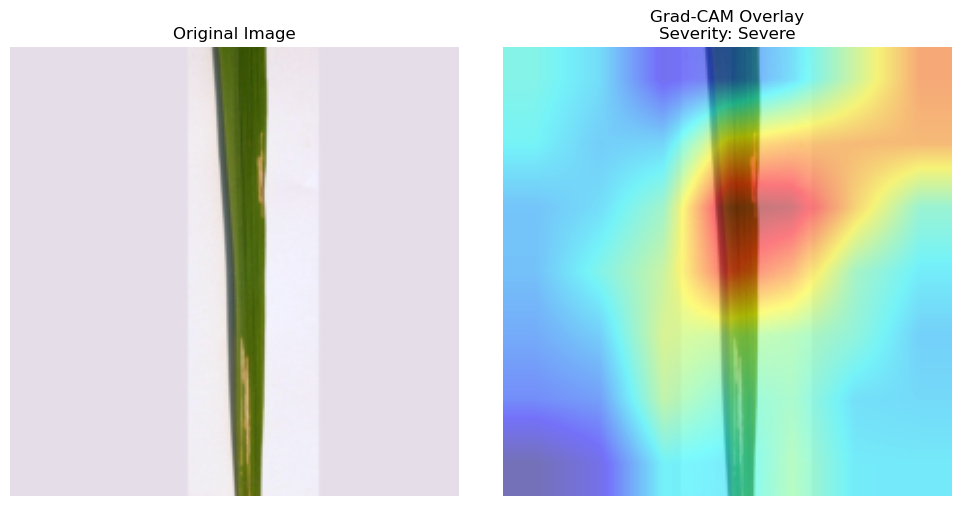

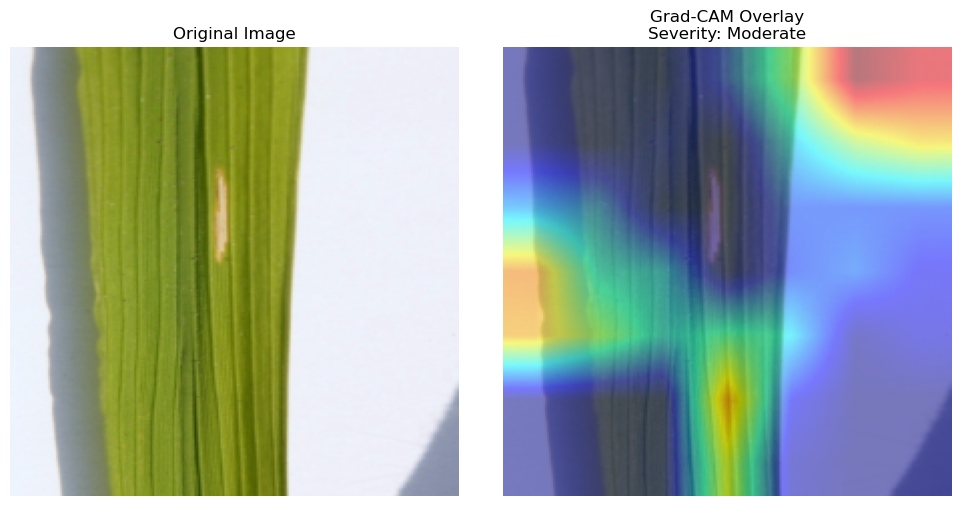

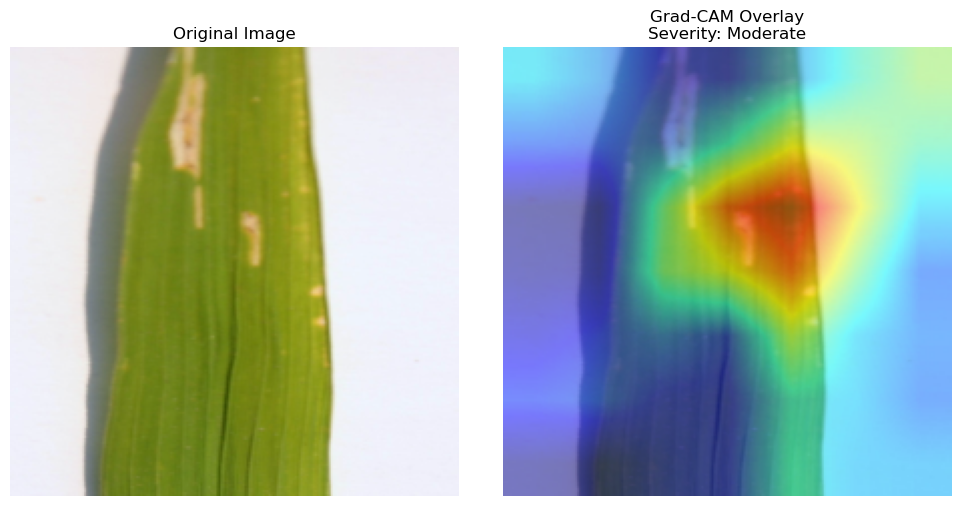

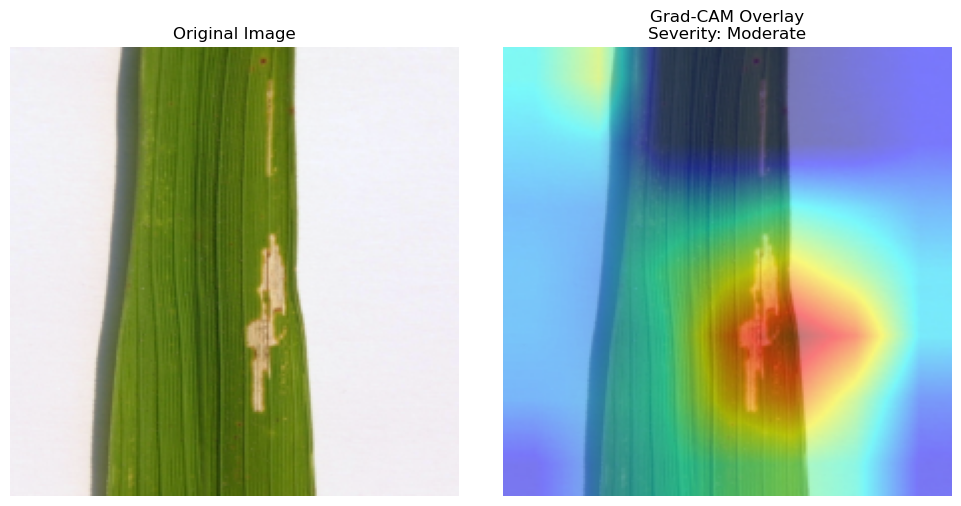

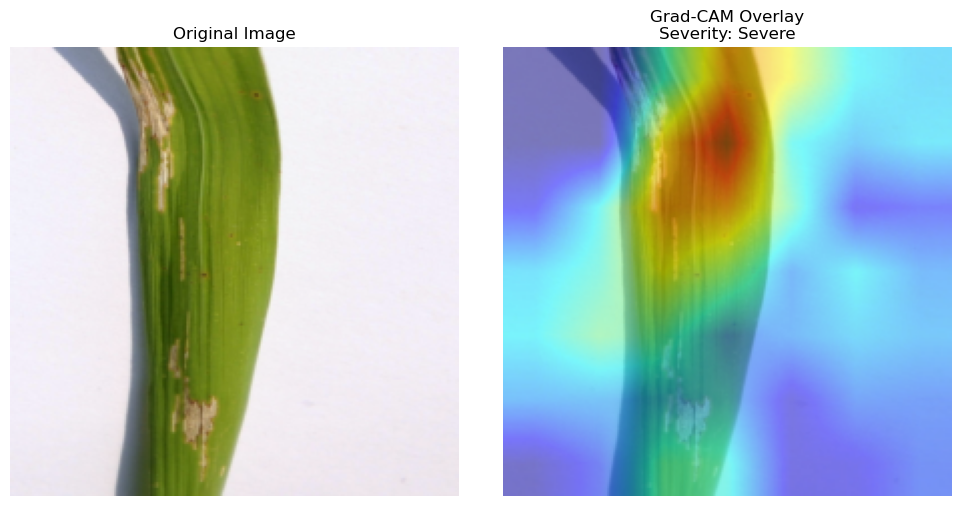

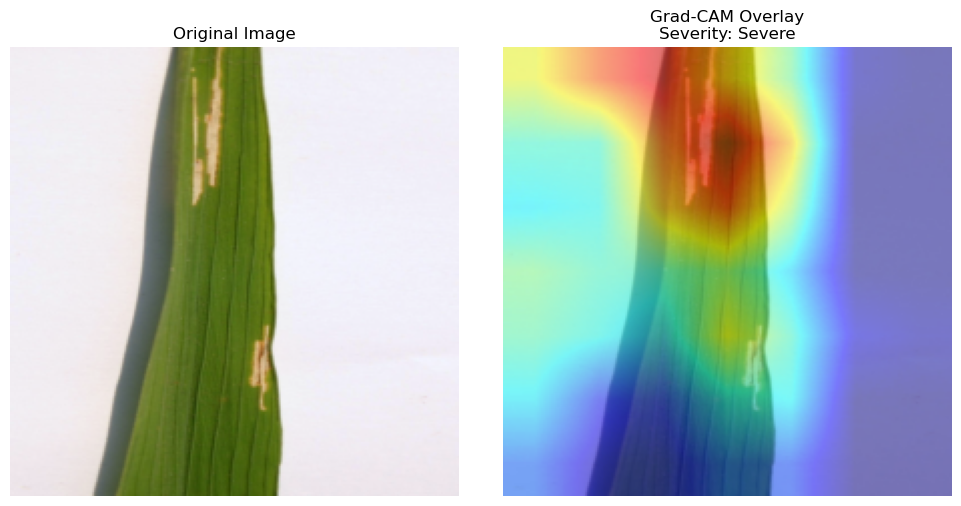

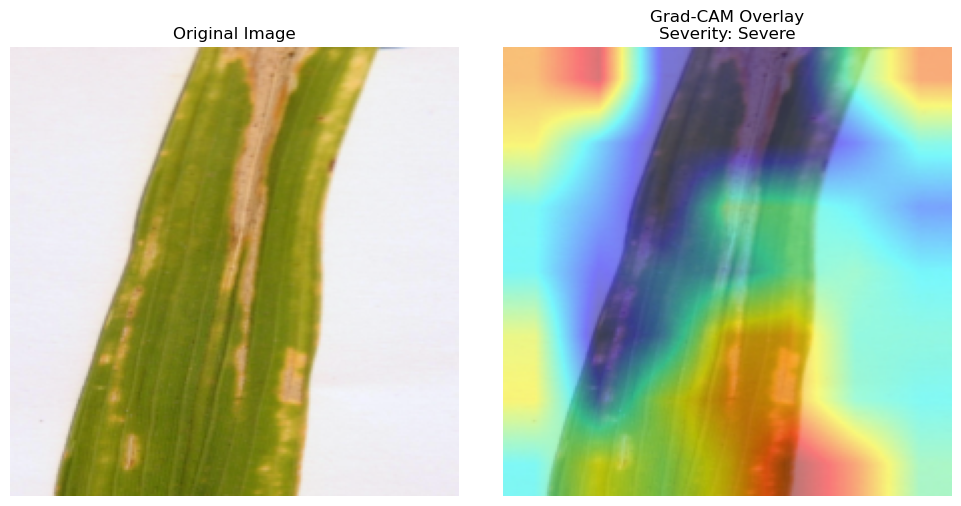

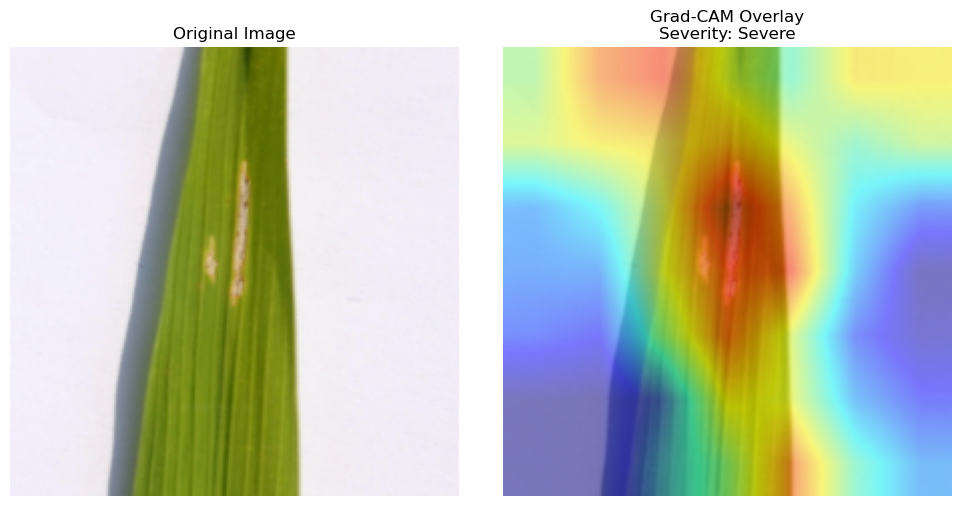

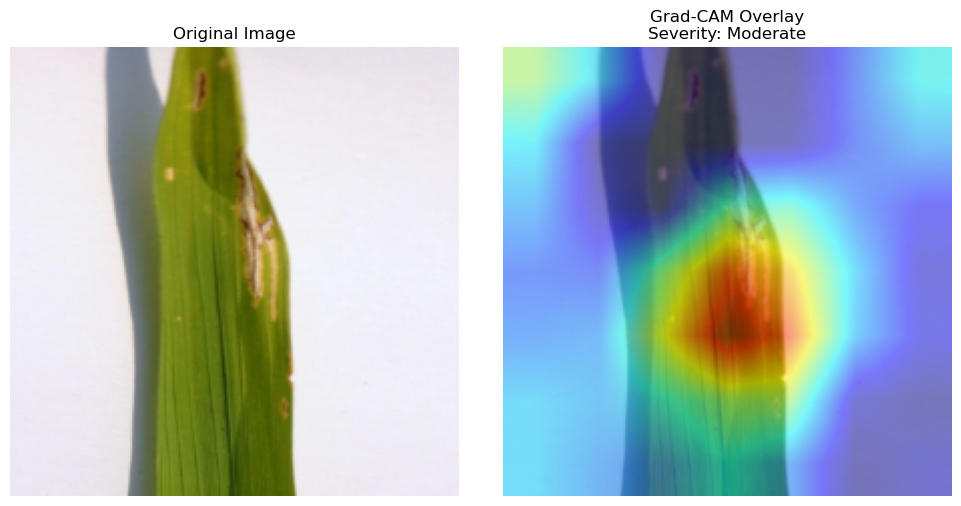

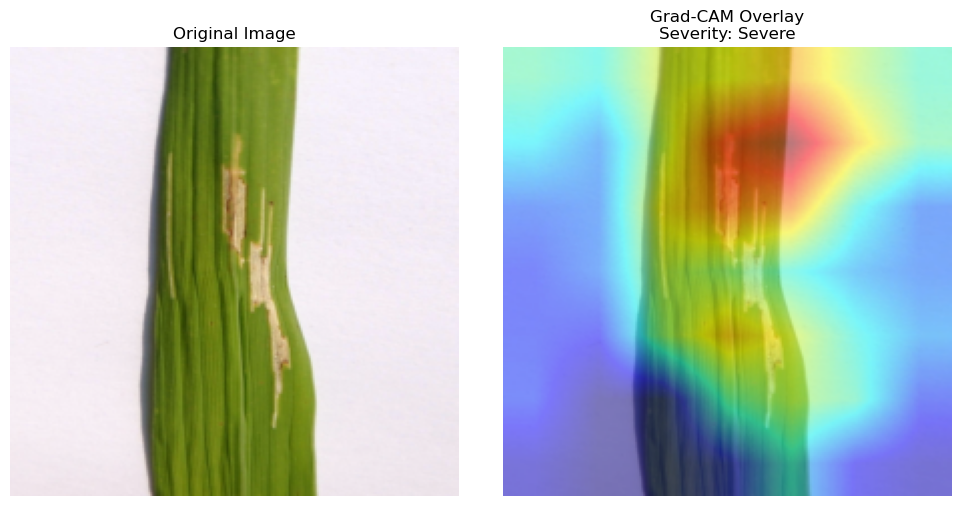

In [7]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image

# -------------------------
# Severity Estimation Function
# -------------------------
def compute_severity(cam_map: np.ndarray, threshold: float = 0.3) -> str:
    cam_map = (cam_map - cam_map.min()) / (cam_map.max() - cam_map.min() + 1e-8)
    severe_area_ratio = np.sum(cam_map > threshold) / cam_map.size
    if severe_area_ratio < 0.2:
        return "Mild"
    elif severe_area_ratio < 0.5:
        return "Moderate"
    else:
        return "Severe"

# -------------------------
# Grad-CAM Setup
# -------------------------
target_layer = model.layer4[-1]  # Last conv block in ResNet-50
cam = GradCAM(model=model, target_layers=[target_layer])  # Removed device param

# -------------------------
# Visualize a Few Validation Images with CAM
# -------------------------
model.eval()
count = 0

for images, labels in val_loader:
    images = images.to(device)
    for i in range(images.size(0)):
        input_tensor = images[i].unsqueeze(0)  # Single image tensor

        # Generate CAM
        grayscale_cam = cam(input_tensor=input_tensor.to(device))[0]  # Make sure input is on device

        # Original image as numpy for overlay
        image_np = input_tensor[0].detach().cpu().permute(1, 2, 0).numpy()
        image_np = (image_np - image_np.min()) / (image_np.max() - image_np.min() + 1e-8)

        # Get CAM overlay
        cam_overlay = show_cam_on_image(image_np, grayscale_cam, use_rgb=True)

        # Compute severity
        severity = compute_severity(grayscale_cam)

        # Display
        fig, axs = plt.subplots(1, 2, figsize=(10, 5))
        axs[0].imshow(image_np)
        axs[0].set_title("Original Image")
        axs[0].axis('off')

        axs[1].imshow(cam_overlay)
        axs[1].set_title(f"Grad-CAM Overlay\nSeverity: {severity}")
        axs[1].axis('off')

        plt.tight_layout()
        plt.show()

        count += 1
        if count == 10:
            break
    break  # Only one batch for visualization
